In [1]:
#importing
from astropy.table import Table, join, unique
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import matplotlib.colors as colors
from matplotlib.ticker import MultipleLocator, FixedLocator, FormatStrFormatter
%matplotlib inline 

In [40]:
#reading files using Table.read function in astropy.table
data_summary_6866 = Table.read("summary_ngc6866.csv")
data_gaia_6866 = Table.read("summary_ngc6866_xmatch_gaiadr3.csv")
data_kic_6866_all = Table.read("summary_ngc6866_xmatch_kic.csv")
data_kic_6866 = data_kic_6866_all['id', 'KIC'] #only need kic and ids not the other columns

In [41]:
len(data_kic_6866)

5568

In [42]:
check = unique(data_kic_6866, keys = 'id')
print(len(check))

2874


In [43]:
values, counts = np.unique(check['KIC'], return_counts = True)

In [44]:
len(np.where(counts > 1)[0])

0

In [45]:
#isolating the columns from gaia that is needed in the output table
data_gaia_6866.sort(keys = 'angDist')
data_gaia_6866_columnsneeded = unique(data_gaia_6866['angDist','id', 'RAdeg', 'e_RAdeg', 'DEdeg', 'e_DEdeg', 'DR3Name'],keys='id')
data_gaia_6866_columnsneeded.sort(keys = ['id', 'angDist'])
data_gaia_6866_columnsneeded2 = unique(data_gaia_6866_columnsneeded['angDist','id', 'RAdeg', 'e_RAdeg', 'DEdeg', 'e_DEdeg', 'DR3Name'], keys = 'DR3Name')

In [46]:
#using join function to merge data files 
combined_table = join(data_summary_6866, data_gaia_6866_columnsneeded2, keys='id', join_type ='right')
combined_table_wantedcolumns= combined_table['angDist', 'id', 'hjd', 'ra', 'dec','v', 'bv', 'teff', 'feh', 'feh_err', 'logg', 'logg_err', 'rv', 'rve','vsini', 'vsini_err','RAdeg', 'e_RAdeg', 'DEdeg', 'e_DEdeg', 'DR3Name']

In [47]:
#using join function to merge KIC data

In [48]:
combined_table_all = join(combined_table_wantedcolumns, unique(data_kic_6866, keys = 'id'), 
                          keys =['id'], join_type='left')

In [49]:
len(data_kic_6866),len(data_summary_6866),len(combined_table),len(combined_table_wantedcolumns),len(combined_table_all)

(5568, 4586, 4586, 4586, 4586)

In [50]:
x = unique(combined_table_all)
print(len(x))

4586


In [51]:
combined_table_all.write('Combined_Data_6866.csv', format = 'csv', overwrite = True)

In [212]:
#checking to see if sort actually sorted 
#print(combined_table_wanted)

In [221]:
#using unique function to get the first instance of each id 
unique_ids = unique(data_gaia_6866, keys = 'id')
unique_ids.sort(keys = ['id', 'angDist'])
unique_ids2 = unique(unique_ids, keys = 'DR3Name')


In [222]:
#checking to see if it worked 
#print(unique_ids2)

In [223]:
#using numpy unique function to get the values of the unique ids and how many times they appear 
values, counts = np.unique(unique_ids_combined['id'], return_counts=True)

In [224]:
#seeing where the unique values appear more than once 
duplicates = counts > 1

In [225]:
#using the location of the duplicated unique values to find which ids are duplicated 
duplicated_ids=values[np.where(duplicates)]

In [226]:
# how many ids are duplicated 
len(duplicated_ids)

0

In [227]:
unique_ids2.write('Combined_Data_Unique_6866.csv', format = 'csv', overwrite = True)

In [83]:
#function that plots V vs B-V
def VvsBV(tbl):
    fig, ax = plt.subplots()
    ax.plot(tbl['bv'], tbl['v'], '.')
    ax.set_xlabel('B-V')
    ax.set_ylabel('V')
    ax.tick_params(axis='both', direction='in', length=6, top=True, right=True)
    XminorLocator = MultipleLocator(0.05)
    YminorLocator = MultipleLocator(0.5)
    ax.xaxis.set_minor_locator(XminorLocator)
    ax.yaxis.set_minor_locator(YminorLocator)
    ax.tick_params(which='minor',axis='both',direction='in',length=3,top=True,right=True)
    ax.invert_yaxis() #flip y axis
    plt.show();

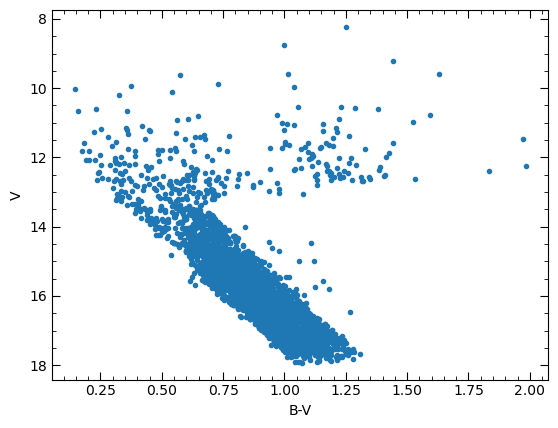

In [92]:
VvsBV(unique_ids2)

In [85]:
#function that plots G vs BP-RP
def GvsBPRP(tbl):
    fig, ax = plt.subplots()
    ax.plot(tbl['BP-RP'], tbl['Gmag'], '.')
    ax.set_xlabel('BP-RP')
    ax.set_ylabel('Gmag')
    ax.tick_params(axis='both', direction='in', length=6, top=True, right=True)
    XminorLocator = MultipleLocator(0.25)
    YminorLocator = MultipleLocator(0.5)
    ax.xaxis.set_minor_locator(XminorLocator)
    ax.yaxis.set_minor_locator(YminorLocator)
    ax.tick_params(which='minor',axis='both',direction='in',length=3,top=True,right=True)
    ax.invert_yaxis() #flip y axis
    plt.show();

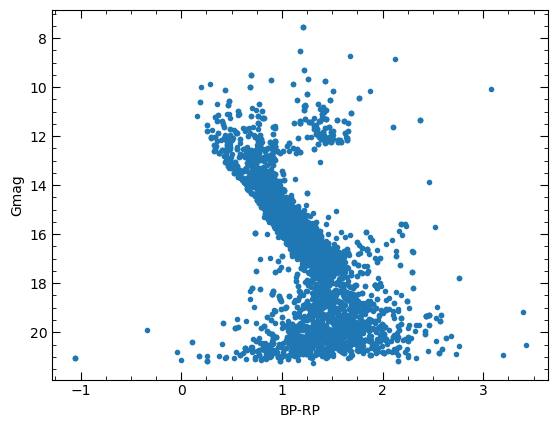

In [86]:
GvsBPRP(data_gaia_6866)

In [87]:
#data_gaia_6866.info

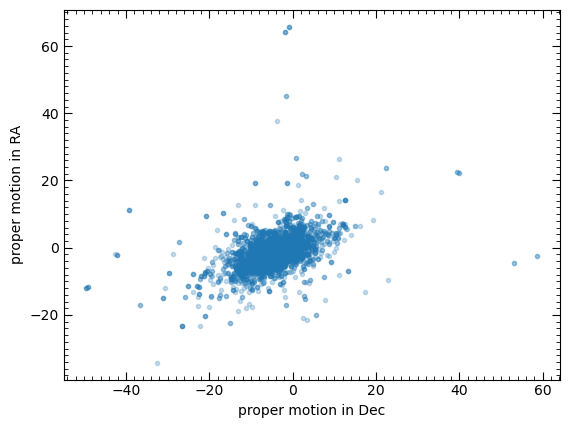

In [88]:
#plot proper motion in Ra vs proper motion in Dec 
fig, ax = plt.subplots()
ax.plot(data_gaia_6866['pmDE'], data_gaia_6866['pmRA'], '.', alpha = 0.25)
ax.set_xlabel('proper motion in Dec')
ax.set_ylabel('proper motion in RA')
ax.tick_params(axis='both', direction='in', length=6, top=True, right=True)
XminorLocator = MultipleLocator(2)
YminorLocator = MultipleLocator(2)
ax.xaxis.set_minor_locator(XminorLocator)
ax.yaxis.set_minor_locator(YminorLocator)
ax.tick_params(which='minor',axis='both',direction='in',length=3,top=True,right=True)

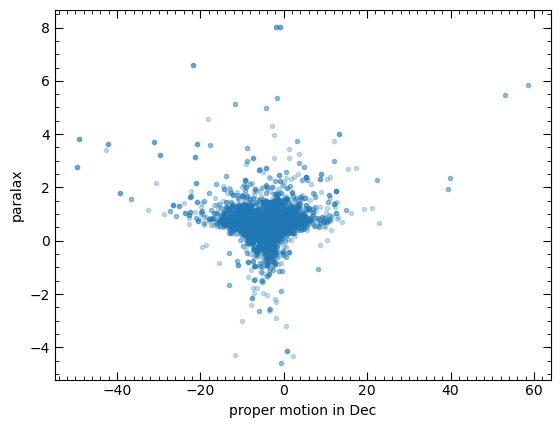

In [89]:
#plot paralax vs proper motion in Dec
fig, ax = plt.subplots()
ax.plot(data_gaia_6866['pmDE'], data_gaia_6866['Plx'], '.', alpha = 0.25)
ax.set_xlabel('proper motion in Dec')
ax.set_ylabel('paralax')
ax.tick_params(axis='both', direction='in', length=6, top=True, right=True)
XminorLocator = MultipleLocator(2)
YminorLocator = MultipleLocator(.5)
ax.xaxis.set_minor_locator(XminorLocator)
ax.yaxis.set_minor_locator(YminorLocator)
ax.tick_params(which='minor',axis='both',direction='in',length=3,top=True,right=True)

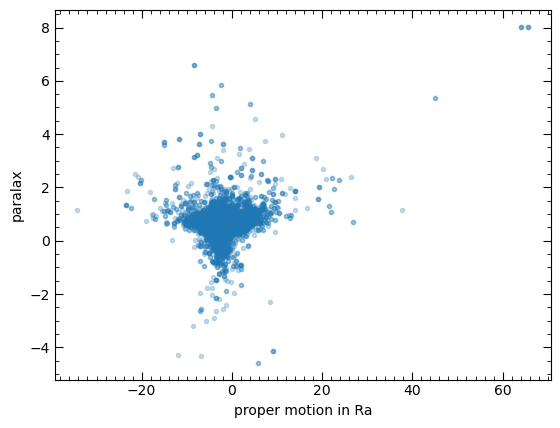

In [90]:
#plot paralax vs proper motion in RA
fig, ax = plt.subplots()
ax.plot(data_gaia_6866['pmRA'], data_gaia_6866['Plx'], '.', alpha = 0.25)
ax.set_xlabel('proper motion in Ra')
ax.set_ylabel('paralax')
ax.tick_params(axis='both', direction='in', length=6, top=True, right=True)
XminorLocator = MultipleLocator(2)
YminorLocator = MultipleLocator(.5)
ax.xaxis.set_minor_locator(XminorLocator)
ax.yaxis.set_minor_locator(YminorLocator)
ax.tick_params(which='minor',axis='both',direction='in',length=3,top=True,right=True)